<font size="5">***Import and Configure Modules***</font>

In [268]:
# John Carther V. Lao
# Modified CNN

#import libraries
import os
import random
import itertools
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

#additional libraries
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout, SeparableConv2D

<font size="5">***Machine Learning Step: Gathering Data***</font>

In [269]:
#Define train test and validation file path
train_path = "C:\\Users\\Carther\\Desktop\\Practice_Exercise\\datasets\\train"
test_path = "C:\\Users\\Carther\\Desktop\\Practice_Exercise\\datasets\\test"
valid_path = "C:\\Users\\Carther\\Desktop\\Practice_Exercise\\datasets\\validation\\"

<font size="5">***Machine Learning Step: Preparing Data***</font>

In [270]:
# Creating train, test and valid batches from the respective directories
# using imagedatagenerator
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['Covid', 'Viral Pneumonia', 'Normal'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['Covid', 'Viral Pneumonia', 'Normal'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['Covid', 'Viral Pneumonia', 'Normal'], batch_size=10, shuffle=False)

Found 249 images belonging to 3 classes.
Found 0 images belonging to 3 classes.
Found 65 images belonging to 3 classes.


In [271]:
# plot images in the form of a 1 by 10 grid and resize img to 20x20
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img.astype(np.uint8))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

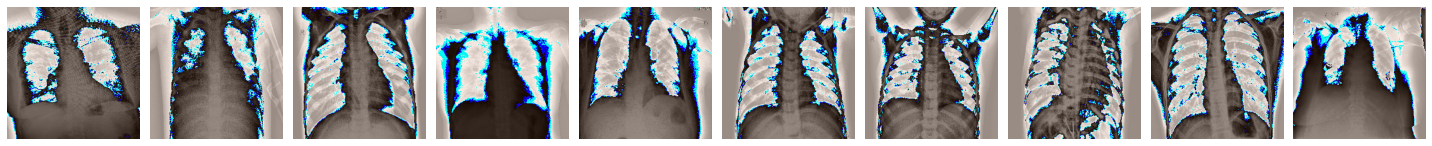

In [272]:
# display images to check file paths
imgs, labels = next(train_batches)
plotImages(imgs)

<font size="5">***Machine Learning Step: Choosing a Model***</font>

In [273]:
# CNN Based Model in Keras

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Dropout(rate=0.2),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Dropout(rate=0.2),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    
    Dense(units=3, activation='softmax')
])

In [274]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

<font size="5">***Machine Learning Step: Train Model***</font>

In [276]:
# set batch size 
batch_size = 10

# fit model and start epochs
pred_model = model.fit(
        x = train_batches, 
        steps_per_epoch = train_batches.samples // batch_size, 
        epochs = 20, 
        validation_data = test_batches, 
        validation_steps = test_batches.samples // batch_size,
        verbose = 1)

Epoch 1/20
24/24 [==============================] - 17s 705ms/step - loss: 0.2334 - accuracy: 0.9623 - val_loss: 0.9857 - val_accuracy: 0.8333
Epoch 2/20
24/24 [==============================] - 17s 701ms/step - loss: 0.1892 - accuracy: 0.9707 - val_loss: 1.4497 - val_accuracy: 0.8667
Epoch 3/20
24/24 [==============================] - 17s 713ms/step - loss: 0.1402 - accuracy: 0.9833 - val_loss: 1.3786 - val_accuracy: 0.8333
Epoch 4/20
24/24 [==============================] - 17s 699ms/step - loss: 0.1095 - accuracy: 0.9791 - val_loss: 1.4809 - val_accuracy: 0.8500
Epoch 5/20
24/24 [==============================] - 17s 695ms/step - loss: 0.1402 - accuracy: 0.9833 - val_loss: 1.1161 - val_accuracy: 0.8667
Epoch 6/20
24/24 [==============================] - 17s 694ms/step - loss: 0.1013 - accuracy: 0.9791 - val_loss: 1.2046 - val_accuracy: 0.8500
Epoch 7/20
24/24 [==============================] - 17s 723ms/step - loss: 0.0856 - accuracy: 0.9874 - val_loss: 1.1364 - val_accuracy: 0.8500

<font size="5">***Machine Learning Step: Evaluate Model***</font>

<font size="3">***Model Accuracy: 90.00%***</font>

In [278]:
#show layers of model
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_124 (Conv2D)         (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_132 (MaxPooli  (None, 112, 112, 32)     0         
 ng2D)                                                           
                                                                 
 dropout_63 (Dropout)        (None, 112, 112, 32)      0         
                                                                 
 conv2d_125 (Conv2D)         (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_133 (MaxPooli  (None, 56, 56, 64)       0         
 ng2D)                                                           
                                                                 
 dropout_64 (Dropout)        (None, 56, 56, 64)      

In [279]:
# making predictions
predictions = model.predict(x = test_batches, verbose=1)

7/7 [==============================] - 1s 190ms/step


In [280]:
#Define Confusion Matrix

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')       

Text(0.5, 6.800000000000011, 'Predicted label')

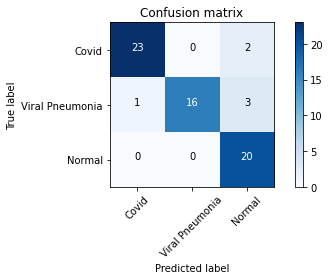

In [281]:
# Display confusion matrix of Predictions against True Labels
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
plot_confusion_matrix(cm, classes = ['Covid', 'Viral Pneumonia', 'Normal'])

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

<font size="5">***Machine Learning Step: Make Predictions***</font>

<font size="3">***Use validation folder to make predictions***</font>

In [283]:
# Give diagnosis for validation data set

classes = ['C','V', 'N']

picnum = []
pred = []

# Create for loop to access every jpeg in directory 
for i in os.listdir(valid_path):
    val_img = tf.keras.utils.load_img(valid_path+i,target_size=(224,224))
    val_img = tf.keras.utils.img_to_array(val_img)
    val_img = np.expand_dims(val_img,axis=0)
    predict_x=model.predict(val_img)
    print(predict_x)
    output = classes[np.argmax(predict_x)]
    picnum.append(i)
    pred.append(output)
    print("Picture #", i,"\n Diagnosis: ", output)

1/1 [==============================] - 0s 43ms/step
[[4.3175667e-08 1.8330268e-11 1.0000000e+00]]
Picture # pic1.jpeg 
 Diagnosis:  N
1/1 [==============================] - 0s 34ms/step
[[2.9970839e-05 2.1088739e-04 9.9975914e-01]]
Picture # pic10.jpeg 
 Diagnosis:  N
1/1 [==============================] - 0s 35ms/step
[[2.0068897e-04 1.2302169e-05 9.9978703e-01]]
Picture # pic2.jpeg 
 Diagnosis:  N
1/1 [==============================] - 0s 34ms/step
[[1.4191165e-08 1.0000000e+00 4.5090501e-11]]
Picture # pic3.jpeg 
 Diagnosis:  V
1/1 [==============================] - 0s 34ms/step
[[5.9419281e-15 9.9999785e-01 2.1962583e-06]]
Picture # pic4.jpeg 
 Diagnosis:  V
1/1 [==============================] - 0s 35ms/step
[[6.5837714e-19 6.7438814e-04 9.9932563e-01]]
Picture # pic5.jpeg 
 Diagnosis:  N
1/1 [==============================] - 0s 35ms/step
[[1.00000000e+00 1.94011541e-13 1.02197044e-22]]
Picture # pic6.jpeg 
 Diagnosis:  C
1/1 [==============================] - 0s 35ms/step
[[1.00

In [286]:
# Combine lists and create DataFrame
picnum = pd.DataFrame(picnum, columns = ["Picture #"])
pred = pd.DataFrame(pred, columns = ['Diagnosis'])

final_output = pd.concat([picnum, pred], axis = 1)
final = final_output.set_index("Picture #")

In [287]:
# Extract output dataframe to .csv file
final.to_csv('lao_cnn_output_ex.csv')